# What is a Decision Tree?

 - A decision tree is simply a set of cascading questions
 - When you get a data point (i.e. set of features and values), you use each attribute (i.e. a value of a given feature of the data point) to answer a question
 - The answer to each question decides the next question
 - At the end of this sequence of questions, you will end up with a probability of the data point belonging to each class
 - Decision tree is a type of supervised learning algorithm (having a predefined target variable) that is mostly used in classification problemS
 - It works for both categorical and continuous input and output variables.

<img src = https://www.analyticsvidhya.com/wp-content/uploads/2016/04/dt.png height = 400, width = 400>

 - Let’s say we have a sample of 30 students with four variables,
     - Gender (Boy/ Girl)
     - Class( IX/ X) and 
     - Height (5 to 6 ft) 
     - Play Cricket (Yes or No)
 - 15 out of these 30 play cricket in leisure time Now, 
 - I want to create a model to predict who will play cricket during leisure period? 
 - In this problem, we need to segregate students who play cricket in their leisure time based on highly significant input variable among all three.
 - This is where decision tree helps, it will segregate the students based on all values of three variable and identify the variable, which creates the best homogeneous sets of students
 
<img src = https://www.analyticsvidhya.com/wp-content/uploads/2015/01/Test.png>

 - Decision tree identifies the most significant variable and it’s value that gives best homogeneous sets of population
 - Now the question which arises is, how does it identify the variable and the split? 

# Types of Decision Trees

Types of decision tree is based on the type of target variable we have. It can be of two types:

    - Categorical Variable Decision Tree
    - Continuous Variable Decision Tree

**Categorical Variable Decision Tree:** 
   - Decision Tree which has categorical target variable then it called as categorical variable decision tree

**Continuous Variable Decision Tree:** 
   - Decision Tree has continuous target variable then it is called as Continuous Variable Decision Tree

# Important Terminology related to Tree based Algorithms

Let’s look at the basic terminology used with Decision trees:

**Root Node**: It represents entire population or sample and this further gets divided into two or more homogeneous sets

**Splitting:** It is a process of dividing a node into two or more sub-nodes

**Decision Node:** When a sub-node splits into further sub-nodes, then it is called decision node

**Leaf/ Terminal Node:** Nodes do not split is called Leaf or Terminal node

<img src= https://www.analyticsvidhya.com/wp-content/uploads/2015/01/Decision_Tree_2.png height = 400, width = 400>

**Branch / Sub-Tree:** A sub section of entire tree is called branch or sub-tree

**Parent and Child Node:** A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node

# Advantages

**Easy to Understand:**
 - Decision tree output is very easy to understand even for people from non-analytical background
 - It does not require any statistical knowledge to read and interpret them
 
**Data type is not a constraint:**
 - It can handle both numerical and categorical variables.

**Non Parametric Method:**
 - Decision tree is considered to be a non-parametric method. This means that decision trees have no assumptions about the space distribution and the classifier structure.
 

# How does a tree based algorithms decide where to split?

The decision of making strategic splits heavily affects a tree’s accuracy

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes

Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes

**The algorithm selection is also based on type of target variables. Let’s look at most commonly used algorithms in decision tree:**

## **Gini**

Gini  says, if we select two items from a population at random then they must be of same class

 - It works with categorical target variable “Success” or “Failure”
 - It performs only Binary splits
 - Higher the value of Gini higher the homogeneity

**Steps to Calculate Gini for a split**

we split the population using two input variables Gender and Class. Now, I want to identify which split is producing more homogeneous sub-nodes using Gini

<img src = https://www.analyticsvidhya.com/wp-content/uploads/2015/01/Decision_Tree_Algorithm1.png>

Calculate Gini for sub-nodes, using formula sum of square of probability for success and failure (p^2+q^2)

**Split on Gender:**

 - Calculate, Gini for sub-node Female = (0.2)*(0.2)+(0.8)*(0.8)=0.68
 - Gini for sub-node Male = (0.65)*(0.65)+(0.35)*(0.35)=0.55
 - Calculate weighted Gini for Split Gender = (10/30)*0.68+(20/30)*0.55 = 0.59

**Similar for Split on Class:**

 - Gini for sub-node Class IX = (0.43)*(0.43)+(0.57)*(0.57)=0.51
 - Gini for sub-node Class X = (0.56)*(0.56)+(0.44)*(0.44)=0.51
 - Calculate weighted Gini for Split Class = (14/30)*0.51+(16/30)*0.51 = 0.51

Above, you can see that Gini score for Split on Gender is higher than Split on Class, hence, the node split will take place on Gender

# Are tree based algorithms better than linear models?

“If I can use logistic regression for classification problems and linear regression for regression problems, why is there a need to use trees”? Many of us have this question. And, this is a valid one too.

Actually, you can use any algorithm. It is dependent on the type of problem you are solving. Let’s look at some key factors which will help you to decide which algorithm to use:

- If the relationship between dependent & independent variable is well approximated by a linear model, linear regression will outperform tree based model
- If there is a high non-linearity & complex relationship between dependent & independent variables, a tree model will outperform a classical regression method
- If you need to build a model which is easy to explain to people, a decision tree model will always do better than a linear model. Decision tree models are even simpler to interpret than linear regression!

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv('Diabetes data.txt')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df1 = df.copy()

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df1.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [8]:
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
df1[df1['Glucose'] == 0]
len(df1[df1['Glucose'] == 0])

0

In [17]:
df1[df1['BloodPressure'] == 0]
len(df1[df1['BloodPressure'] == 0])

0

In [18]:
df1[df1['SkinThickness'] == 0]
len(df1[df1['SkinThickness'] == 0])

0

In [19]:
df1[df1['BMI'] == 0]
len(df1[df1['BMI'] == 0])

0

In [20]:
df1[df1['Insulin'] == 0]
len(df1[df1['Insulin'] == 0])

0

In [14]:
zero_columns = ['Glucose','BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

In [15]:
for column in zero_columns:
    mean = df1[column].mean(skipna = True)
    df1[column] = df1[column].replace(0, mean)

In [18]:
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
len(df1.columns)

9

In [20]:
df1.iloc[:, 0:-1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [ ]:
# x = df1.drop('Outcome', axis = 1)
# y = df1['Outcome']

In [22]:
X=df1[df1.columns[0:-1]] # independent variable
Y=df1[df1.columns[-1]] # dependent variable

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state = 98)

In [36]:
tree = DecisionTreeClassifier(criterion='gini') # Gini - Default, #entropy
tree.fit(X_train,y_train)
predictions = tree.predict(X_test)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.695


In [37]:
confusion_matrix(y_test, predictions)

array([[82, 22],
       [25, 25]], dtype=int64)

In [38]:
accuracy_score(y_test, predictions)

0.6948051948051948

In [29]:
tree.predict([[1,2,3,4,5,6,7,8],[10,20,30,40,55,4,32,1]])

array([0, 0], dtype=int64)

# What is Random Forest ? How does it work?

Random Forest is considered to be a panacea of all data science problems. On a funny note, when you can’t think of any algorithm (irrespective of situation), use random forest!

Random Forest is a versatile machine learning method capable of performing both regression and classification tasks. It also undertakes dimensional reduction methods, treats missing values, outlier values and other essential steps of data exploration, and does a fairly good job. It is a type of ensemble learning method, where a group of weak models combine to form a powerful model.

### How does it work?

Random Forest has multiple trees

Each tree gives a classification and we say the tree “votes” for that class. The forest chooses the classification having the most votes

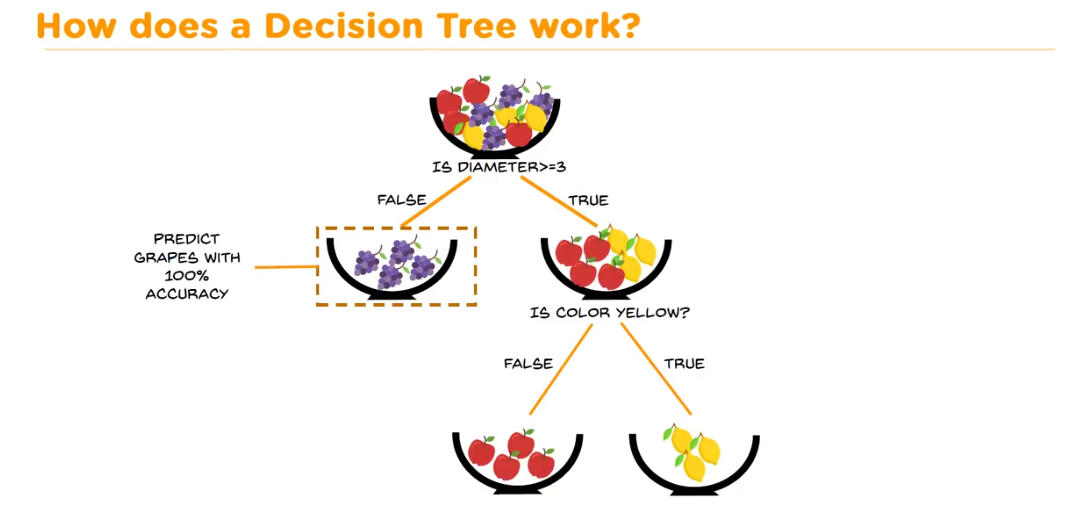

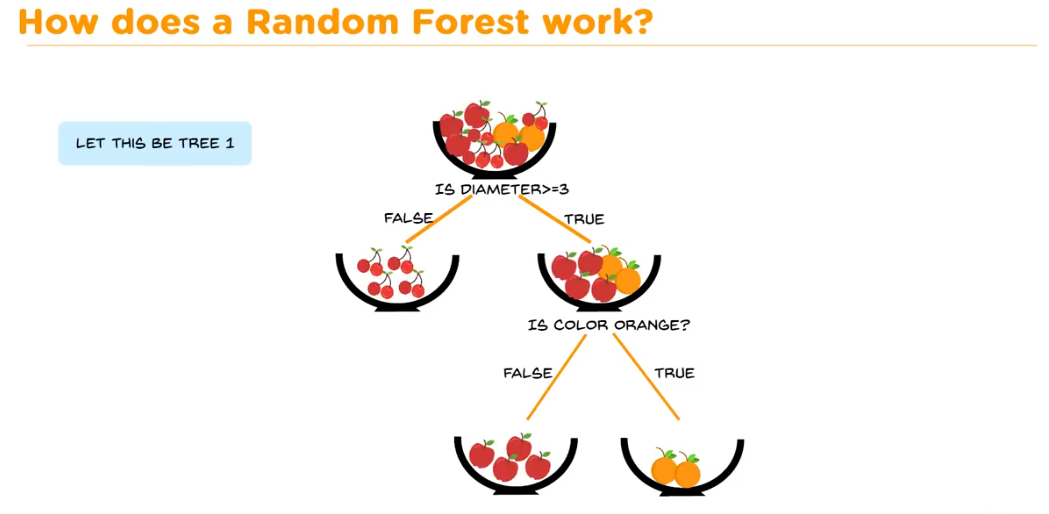

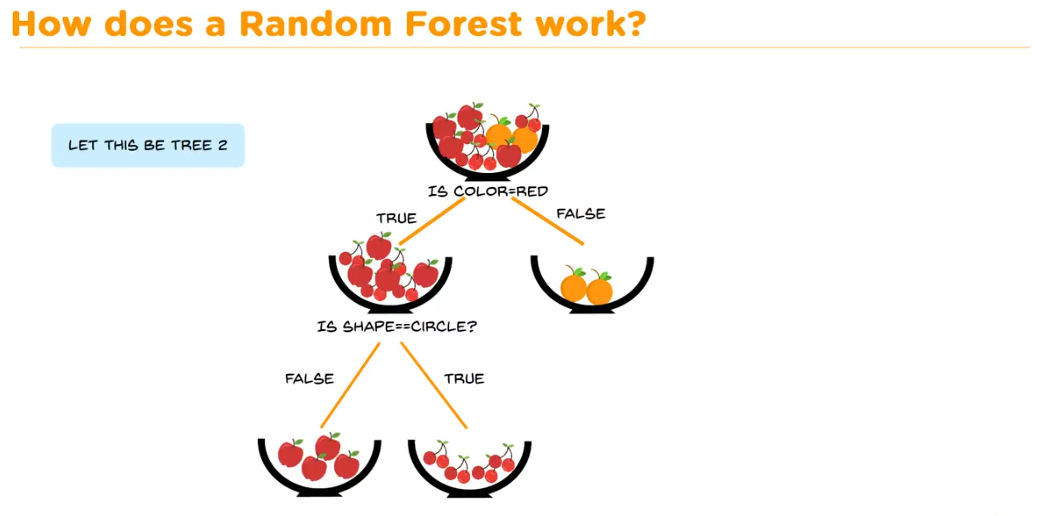

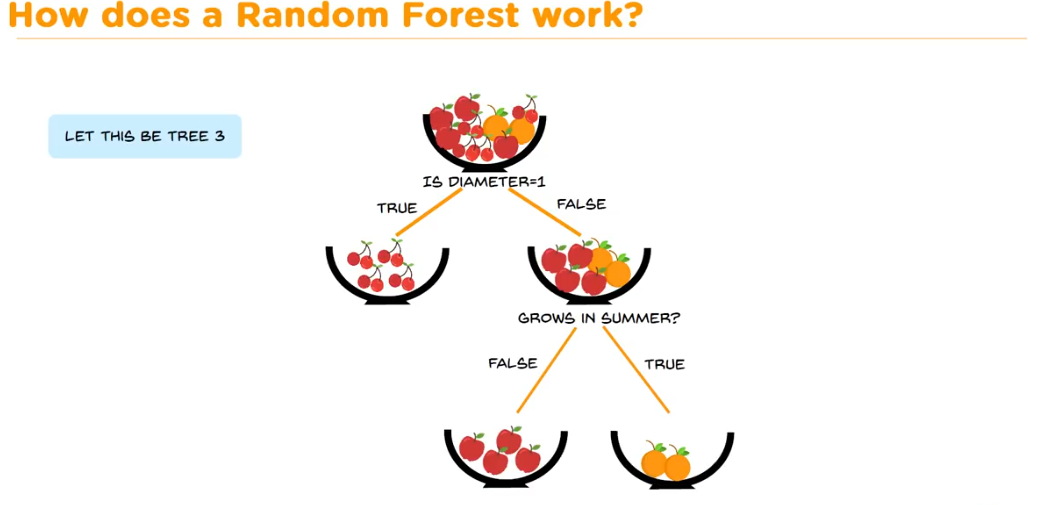

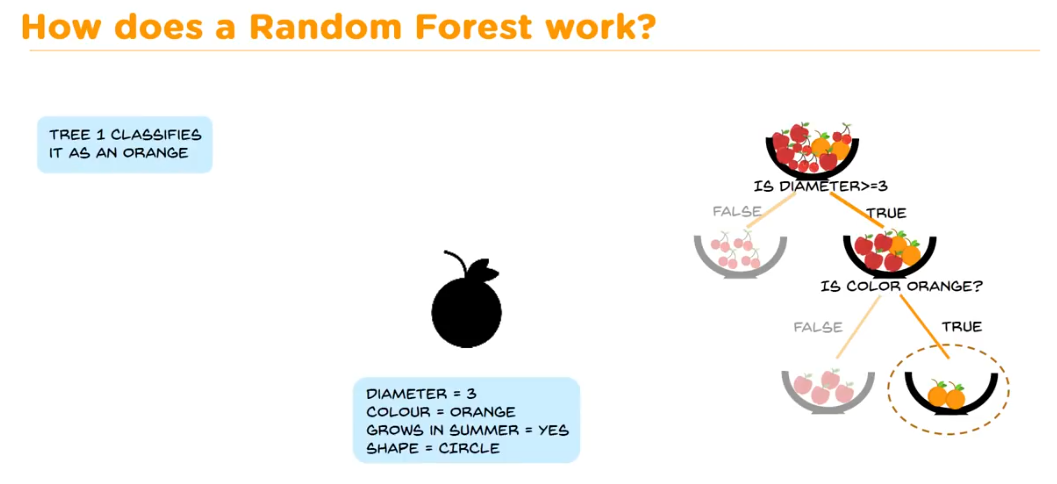

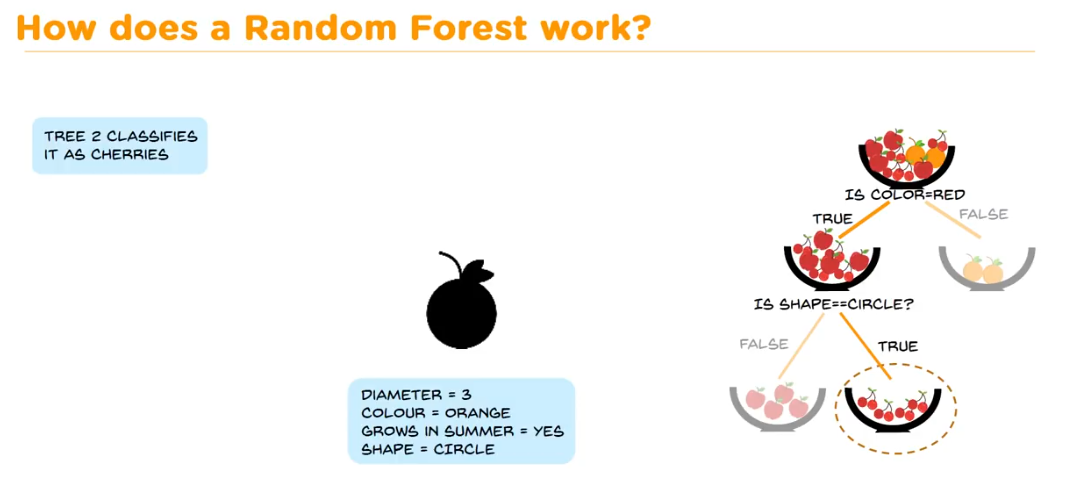

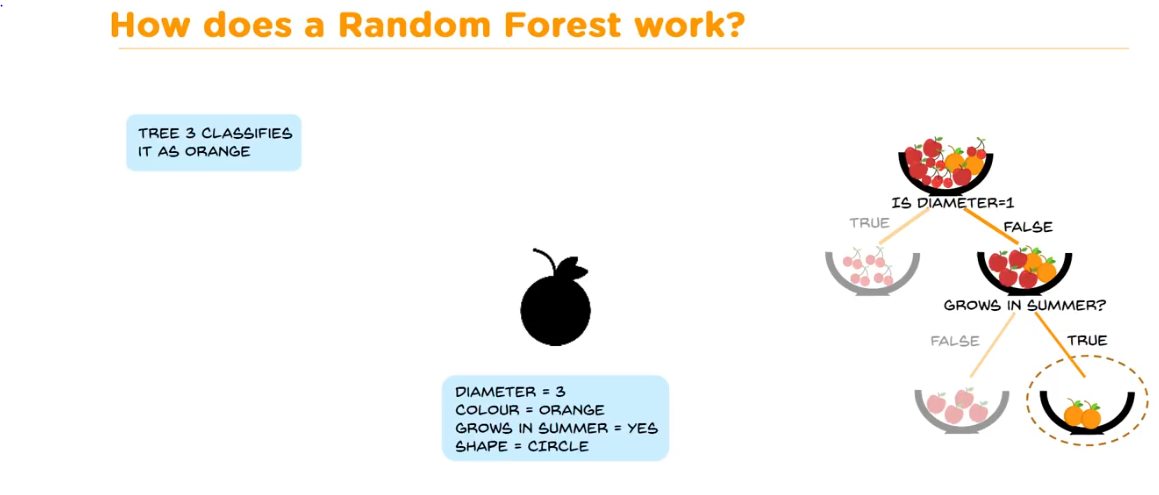

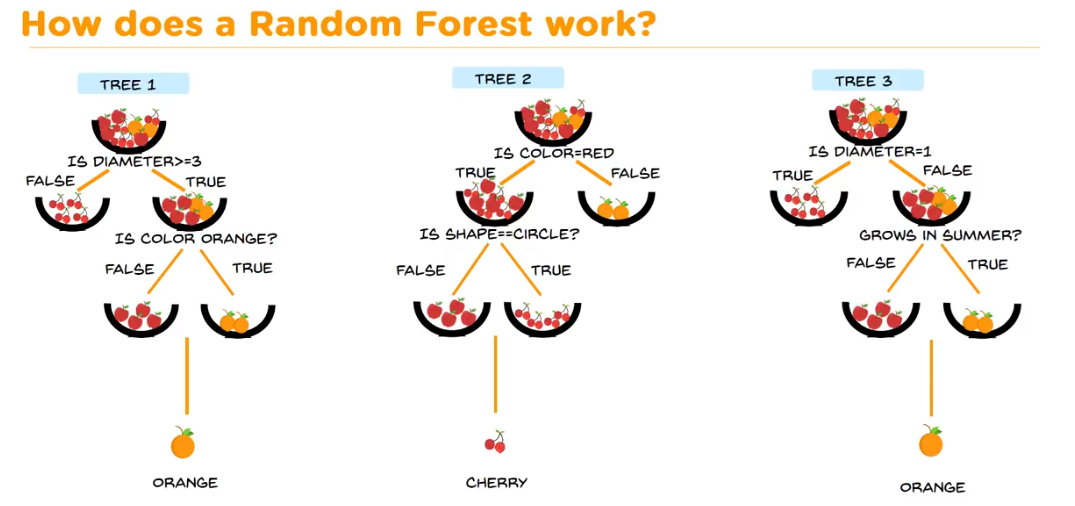

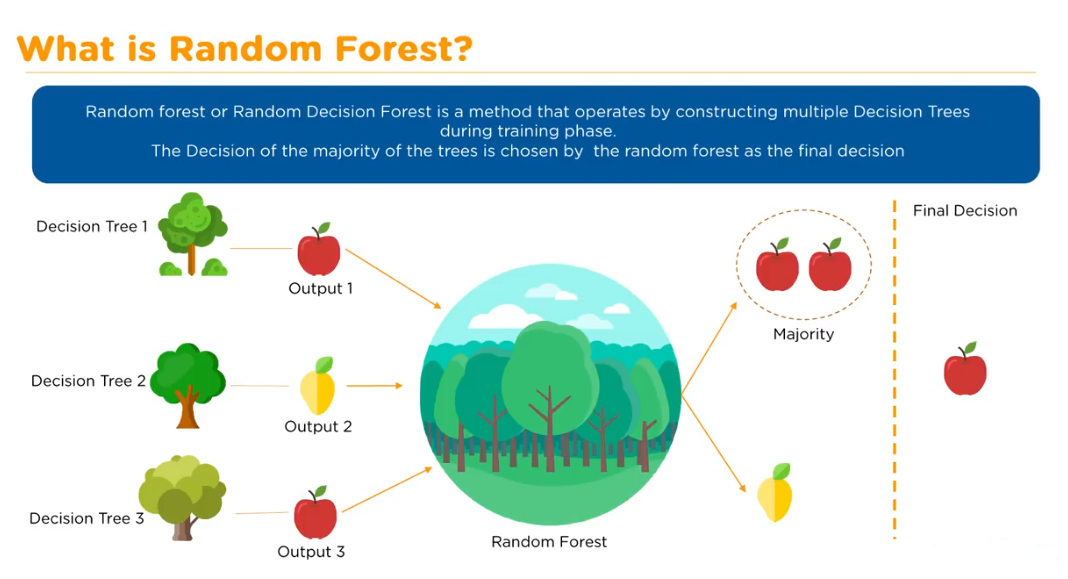

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
df = pd.read_csv('Diabetes data.txt')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
len(df)

768

In [42]:
df1 = df.copy()

In [43]:
len(df1)

768

In [44]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [46]:
df1.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [47]:
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [48]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [49]:
df1[df1['Glucose'] == 0]
len(df1[df1['Glucose'] == 0])

5

In [50]:
df1[df1['BloodPressure'] == 0]
len(df1[df1['BloodPressure'] == 0])

35

In [51]:
df1[df1['SkinThickness'] == 0]
len(df1[df1['SkinThickness'] == 0])

227

In [52]:
df1[df1['BMI'] == 0]
len(df1[df1['BMI'] == 0])

11

In [53]:
df1[df1['Insulin'] == 0]
len(df1[df1['Insulin'] == 0])

374

In [54]:
zero_columns = ['Glucose','BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

In [55]:
for column in zero_columns:
    mean = df1[column].mean(skipna = True)
    df1[column] = df1[column].replace(0, mean)

In [56]:
df1.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [57]:
len(df1.columns)

9

In [58]:
X=df1[df1.columns[0:-1]]

Y=df1[df1.columns[-1]]

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20)

In [60]:
tree = RandomForestClassifier()
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.734


In [61]:
predictions = tree.predict(X_test)

In [62]:
confusion_matrix(y_test, predictions)

array([[82, 16],
       [25, 31]], dtype=int64)

In [63]:
accuracy_score(y_test, predictions)

0.7337662337662337

In [58]:
tree.predict([[1,2,3,4,5,6,7,8]])

array([0], dtype=int64)

In [ ]:
# Decision Tree Classifier
# Random Forest Classifier

# Decision Tree Regressor

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
df = pd.read_csv(r"D:\Teachings\Python\Machine Learning\Algorithms\Linear Regression\1000_Companies.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [67]:
df['State'] = df['State'].astype('category')
df['State'] = df['State'].cat.codes
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [68]:
x = df.iloc[:,:-1] # independent variable
y = df.iloc[:,4] # dependent variable

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20)
len(x_train),len(x_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [70]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred = dtr.predict(x_test)

In [71]:
y_pred

array([ 76376.20305, 117700.8395 , 146499.0017 , 141585.52   ,
       143338.9779 ,  58784.63514,  96581.04826,  89915.86699,
        77242.4545 ,  56789.0105 ,  96581.04826,  57143.54142,
       178847.5987 , 181550.5766 ,  71235.93187,  67226.74247,
        80539.1649 ,  65471.1737 ,  53649.48971,  80106.89347,
       147194.3948 , 168246.6971 , 101119.044  , 168802.8408 ,
        52325.33808, 177513.1956 , 145240.6305 , 175771.2955 ,
       134723.4494 , 111814.772  ,  98368.22581,  65868.41919,
       152894.2269 , 176344.525  ,  78406.85364, 142927.2094 ,
        85842.60573, 126117.3181 , 127075.833  ,  71772.42685,
       177513.1956 , 133834.1321 , 154901.8116 , 169324.8128 ,
       162440.0786 , 103282.38   , 175396.2616 ,  58666.74293,
       168876.3098 , 140589.8682 , 145680.5905 , 134268.9664 ,
       134979.7368 , 127455.1384 , 140872.6387 ,  95279.96251,
       131051.7051 , 120738.6997 ,  71498.49   , 139915.8323 ,
       163470.354  , 111461.9497 , 166402.282  , 181243

In [72]:
y_test

818     76356.55435
769    117637.62200
944    146690.36290
997    413956.48000
708    143415.86410
           ...     
276    162479.37600
94     155954.29850
603     60408.64304
570    113981.25490
451     68648.28331
Name: Profit, Length: 200, dtype: float64

In [73]:
from sklearn.metrics import mean_squared_error, r2_score# evaluation metrics
r2_score(y_test,y_pred)

0.6596157634836234

In [74]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

In [66]:
y_pred

array([138781.410327 ,  71275.0242478, 121294.108638 ,  92479.433079 ,
       182008.06673  ,  95123.4734158, 101011.924394 ,  52701.8670084,
        65810.3957175, 120553.096313 , 102998.657801 ,  53352.2561121,
       111682.2636057, 182955.877393 ,  85932.340498 , 169665.239362 ,
       128139.525339 ,  72618.6878842,  89803.8437635, 122057.665706 ,
        51205.3108417,  99005.3910485,  55854.5695142, 142852.75792  ,
       168409.020969 , 159465.00892  ,  53197.8771193,  68698.3630473,
       173366.764263 ,  86187.6369328,  49946.3475915, 175357.211907 ,
       114413.27001  , 142528.648342 , 105407.289244 , 161034.265282 ,
       178477.195061 ,  90537.7740234,  87054.1019525,  97929.0213126,
        91359.4314638,  80760.1700817,  63776.4561101, 151833.797508 ,
        87660.0166528, 109891.847552 , 144793.041572 , 141534.466774 ,
       155910.341872 , 164357.108489 , 101076.36364  , 133938.509394 ,
       171694.847696 ,  87039.3397969, 154328.103676 , 111224.166207 ,
      

In [67]:
y_test

513    138588.26360
894     71235.93187
312    121140.21660
375     92485.57543
605    182059.73430
           ...     
761    119961.29450
962    171416.97240
228     85830.64565
141     78689.62408
460     88027.88306
Name: Profit, Length: 200, dtype: float64

In [68]:
r2_score(y_test,y_pred)

0.9496925871728372